# Problem 

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to __automate the loan eligibility process__ (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 



__NOTE:__ it is a Binary Classification problem where we have to predict whether a loan would be approved or not.

### Hypothesis Generation ###

- Salary: Applicants with high income should have more chances of loan approval.
- Previous history: Applicants who have repayed their previous debts should have higher chances of loan approval.
- Loan amount: Loan approval should also depend on the loan amount.If the loan amount is less, chances of loan approval should be high.
- Loan term: Loan for less time period and less amount should have higher chances of approval.
- EMI: Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.




__Loading Libraries__

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
import warnings    # to ignore any warnings 
warnings.filterwarnings("ignore")

# Data Analysis

In [2]:
train = pd.read_csv('train_loan.txt')
test = pd.read_csv('test_loan.txt')

# Let's make a copy of the data 
train_original = train.copy()
test_original = test.copy()

In [3]:
print('test set shape : ', test.shape)
print('train set shape : ',train.shape)
train.head()

test set shape :  (367, 12)
train set shape :  (614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Data Description ###

<img src="data_dictionary.png" />

In [4]:
# print data types 
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

## Univariate Analysis ##
* For __categorical features__ we can use frequency table or bar plots which will calculate the number of each category in a particular variable.
* For __numerical features__, probablity density plots can be used to look at the distribution of the variable.


__1.Loan Status  :__ as target variable (categorical)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64
 
around 69% people out of 614 was approved


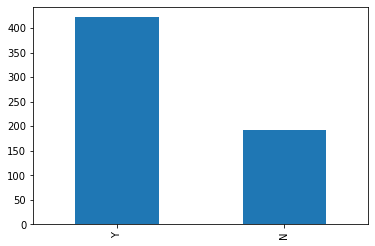

In [5]:
print(train['Loan_Status'].value_counts(normalize=True)) # normalize=True print proportions instead of number
train['Loan_Status'].value_counts().plot.bar()
print(' ')
print('around 69% people out of 614 was approved')

__2.Independent Variable(Categorical)__

Gender, Married, Self_Employed, Credit_History


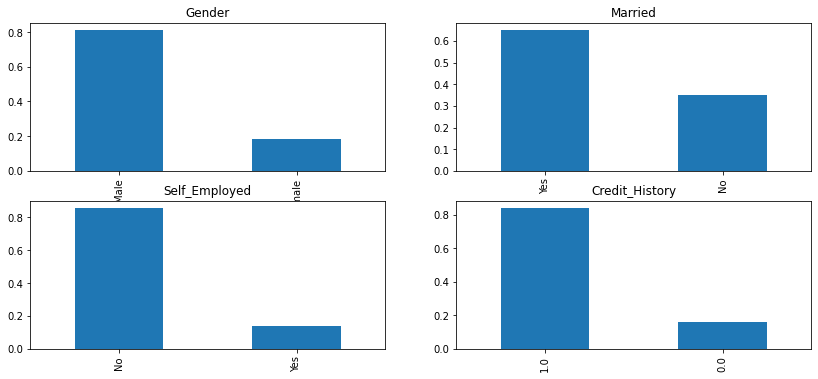

In [6]:
plt.figure(1,figsize=(18,12))

plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(14,6), title='Gender')

plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(figsize=(14,6), title='Married')

plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(14,6), title='Self_Employed')

plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(14,6), title='Credit_History')
plt.show()

- 80% applicants in the dataset are male.
- Around 65% of the applicants in the dataset are married.
- Around 15% applicants in the dataset are self employed.
- Around 85% applicants have repaid their debts.


__3.Independent Variable(Ordinal)__

Dependents, Education, Property_Area

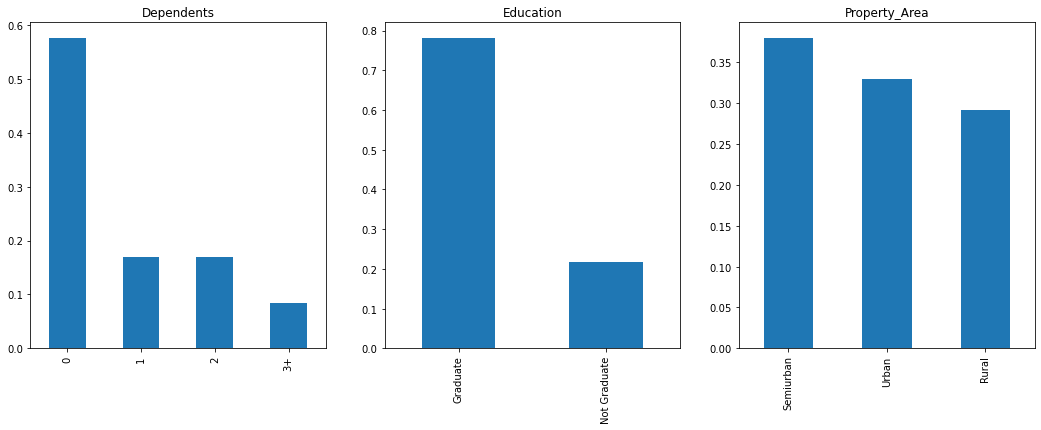

In [7]:
plt.figure(1)

plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(18,6), title='Dependents')

plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title='Education')

plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.show()

- Most of the applicants don’t have any dependents.
- Around 80% of the applicants are Graduate.
- Most of the applicants are from Semiurban area.


__3.Independent Variable(Numerical)__

ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term


__ApplicantIncome__

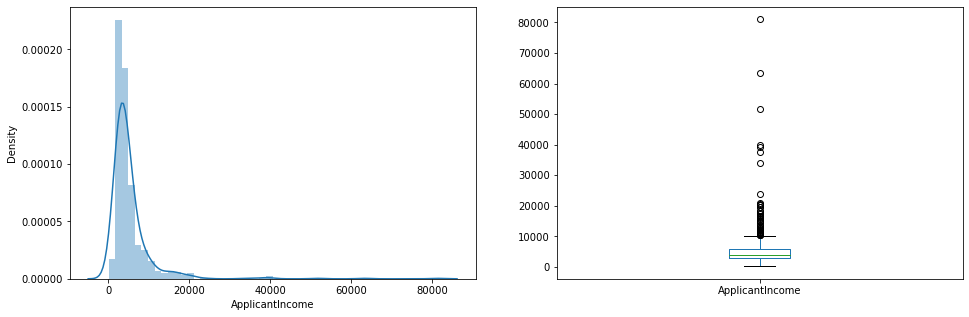

In [8]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])

plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

- Distribution of applicants income is towards left which means it is not normally distributed.
- There are a lot of outliers. This can be atributed to the income disparity.Part of this can be driven by the fact that there are people with different education levels 

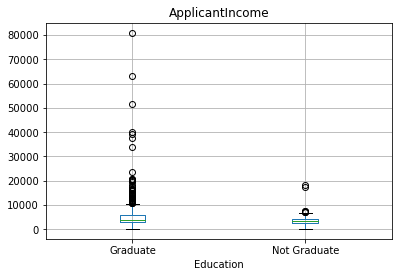

In [9]:
# Let"s see if the eduction level effects the income: 

train.boxplot(column='ApplicantIncome', by='Education')
plt.suptitle("")
plt.show()

- There are a higher number of graduates with very high income, which are appearing to be the outliers 

__CoapplicantIncom__

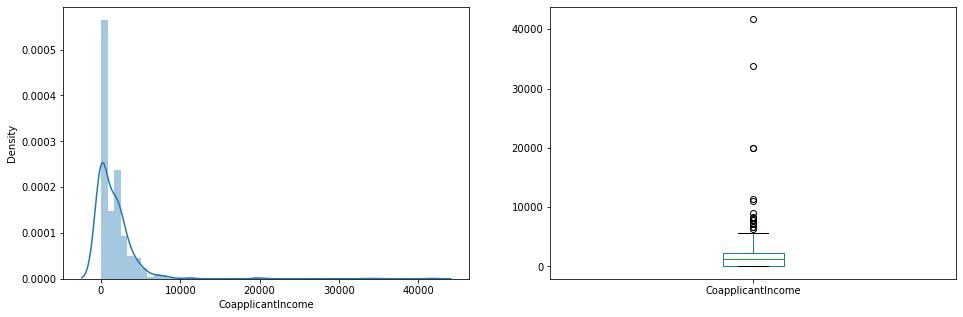

In [10]:
plt.figure(1)

plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])

plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

- Distribution is similar to ApplicantIncome, it is not normally distributed.

__LoanAmount__

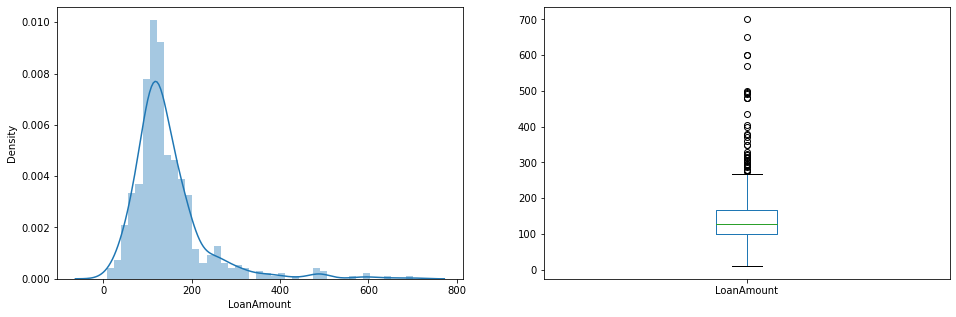

In [11]:
plt.figure(1)

plt.subplot(121)
sns.distplot(train['LoanAmount'])

plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

- There are a lot of outliers but the distribution is fairly normal.

## Bivariate Analysis ##

- We will explore the correlation of the independent variables with target variable "Loan Status" and try to test out hypotheses.

### Categorical Independent Variable vs Target Variable ###


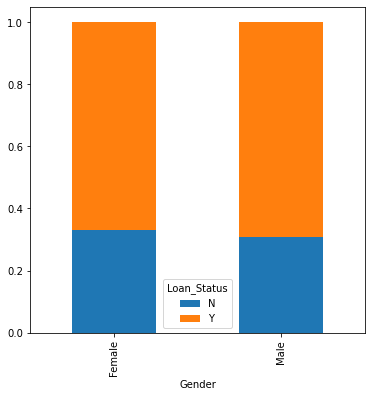

In [12]:
# Gender vs Loan_Status

gender = pd.crosstab(train['Gender'], train['Loan_Status'])
gender.div(gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6))
plt.show()

 - It seems that 'Gender' has almost no effect on 'Loan_Status'

In [13]:
married = pd.crosstab(train['Married'], train['Loan_Status'])
married

Loan_Status,N,Y
Married,,
No,79,134
Yes,113,285


In [14]:
married.div(married.sum(1).astype(float), axis=0)

Loan_Status,N,Y
Married,,
No,0.370892,0.629108
Yes,0.283920,0.716080


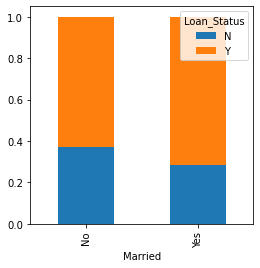

In [15]:
# Married vs Loan_status

married = pd.crosstab(train['Married'], train['Loan_Status'])
married.div(married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()

- Married people have higher proportion for the approved loans.

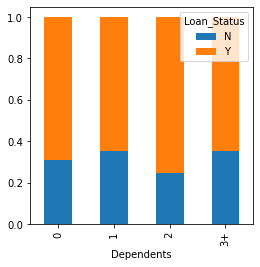

In [16]:
# Dependents vs Loan_status

Dependents = pd.crosstab(train['Dependents'], train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()

- Distribution of applicants with 1 or 3+ dependents is similar
- if you have 2 dependents, you would have more chance to be approved 

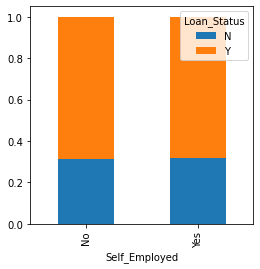

In [17]:
# Self_Employed vs Loan_status

Self_Employed = pd.crosstab(train['Self_Employed'], train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()

- There is no difference between self employed or not 

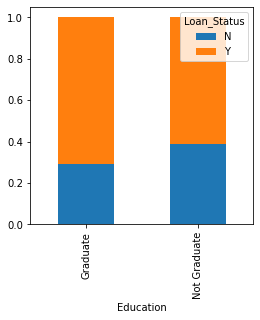

In [18]:
# Education vs Loan_status

Education = pd.crosstab(train['Education'], train['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()

 - Education increase the proportion of to be approved 

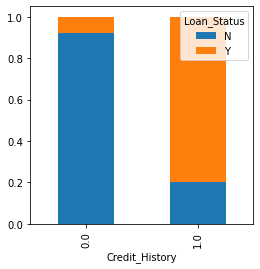

In [19]:
# Credit_History vs Loan_status

Credit_History = pd.crosstab(train['Credit_History'], train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()

- It seems people with credit history as 1 are more likely to get their loans approved.


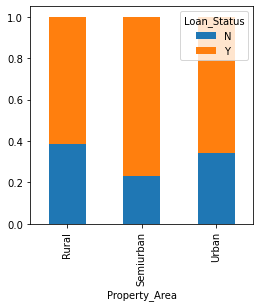

In [20]:
# Property_Area vs Loan_status

Property_Area = pd.crosstab(train['Property_Area'], train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()

- Proportion of loans getting approved in semiurban area is higher as compared to that in rural


### Numerical  Independent Variable vs Target Variable ###


<AxesSubplot:xlabel='Loan_Status'>

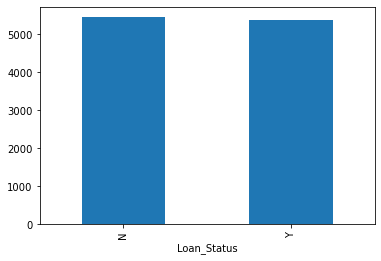

In [21]:
# ApplicantIncome vs Loan_Status 
# Let's find the mean Income of Applicants in 2 groups

train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()


- We don't see any change in the mean income. So, let's make bins for the applicants income

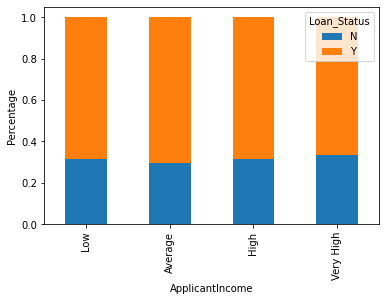

In [22]:
bins = [0, 2500, 4000, 6000, 81000]
group = ['Low', 'Average', 'High', 'Very High']
train['Income_bin'] = pd.cut(train['ApplicantIncome'], bins, labels=group)

income_bin = pd.crosstab(train['Income_bin'], train['Loan_Status'])
income_bin.div(income_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')
plt.show()

- It can be inferred that Applicant income does not affect the chances of loan approval which contradicts our hypothesis in which we assumed that if the applicant income is high the chances of loan approval will also be high.




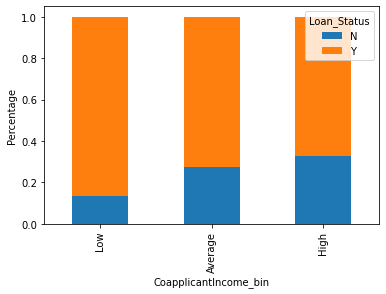

In [23]:
# CoapplicantIncome vs Loan_Status

bins = [0, 1000, 3000, 42000]
group = ['Low', 'Average', 'High']
train['CoapplicantIncome_bin'] = pd.cut(train['CoapplicantIncome'], bins, labels=group)

CoapplicantIncome_bin = pd.crosstab(train['CoapplicantIncome_bin'], train['Loan_Status'])
CoapplicantIncome_bin.div(CoapplicantIncome_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('CoapplicantIncome_bin')
plt.ylabel('Percentage')
plt.show()

- It shows that if coapplicant’s income is less, the chances of loan approval are high. But this does not look right. The possible reason behind this may be that most of the applicants don’t have any coapplicant so the coapplicant income for such applicants is 0 and hence the loan approval is not dependent on it. So we can make a new variable in which we will combine the applicant’s and coapplicant’s income to visualize the combined effect of income on loan approval.

- Let us combine the Applicant Income and Coapplicant Income and see the combined effect of Total Income on the Loan_Status.

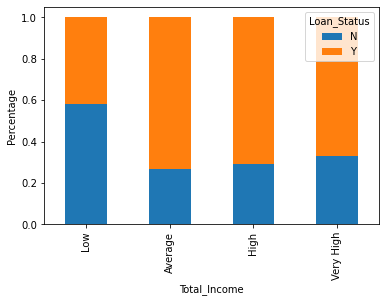

In [24]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']

bins = [0, 2500, 4000, 6000, 81000]
group= ['Low', 'Average', 'High', 'Very High']
train['Total_Income_bin'] = pd.cut(train['Total_Income'], bins, labels=group)

Total_Income_bin = pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

plt.xlabel('Total_Income')
plt.ylabel('Percentage')
plt.show()

- We can see that Proportion of loans getting approved for applicants having low Total_Income is very less as compared to that of applicants with Average, High and Very High Income.

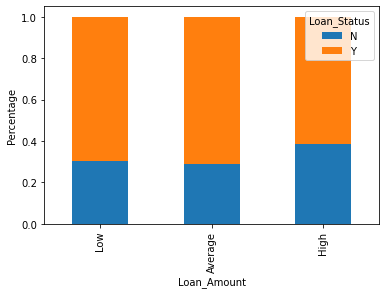

In [25]:
# LoanAmount vs Loan_Status 

bins = [0, 100, 200, 700]
group= ['Low', 'Average', 'High']
train['Loan_Amount_bin'] = pd.cut(train['LoanAmount'], bins, labels=group)

Loan_Amount_bin = pd.crosstab(train['Loan_Amount_bin'],train['Loan_Status'])
Loan_Amount_bin.div(Loan_Amount_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

plt.xlabel('Loan_Amount')
plt.ylabel('Percentage')
plt.show()

- It can be seen that the proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount which supports our hypothesis in which we considered that the chances of loan approval will be high when the loan amount is less.

In [26]:
print(train.columns)
train.head(2)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Income_bin', 'CoapplicantIncome_bin', 'Total_Income',
       'Total_Income_bin', 'Loan_Amount_bin'],
      dtype='object')


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,CoapplicantIncome_bin,Total_Income,Total_Income_bin,Loan_Amount_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High,NaN,5849.0,High,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,Average,6091.0,Very High,Average


## Correlation between all numerical variables ##

- Let’s drop the bins columns which we created for the exploration part. 
- We will change the 3+ in dependents variable to 3 to make it a numerical variable.
- We will also convert the target variable’s categories into 0 and 1 so that we can find its correlation with numerical variables. 
- One more reason to do so is few models like logistic regression takes only numeric values as input. We will replace N with 0 and Y with 1.

In [27]:
train = train.drop(['Income_bin', 'CoapplicantIncome_bin', 'Loan_Amount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)

train['Dependents'].replace('3+', 3, inplace=True)
test['Dependents'].replace('3+', 3, inplace=True)
train['Loan_Status'].replace('Y', 1, inplace=True)
train['Loan_Status'].replace('N', 0, inplace=True)

- use the heat map to visualize the correlation between the numerical variables. 
- Heatmaps visualize data through variations in coloring. 
- The variables with darker color means their correlation is more.

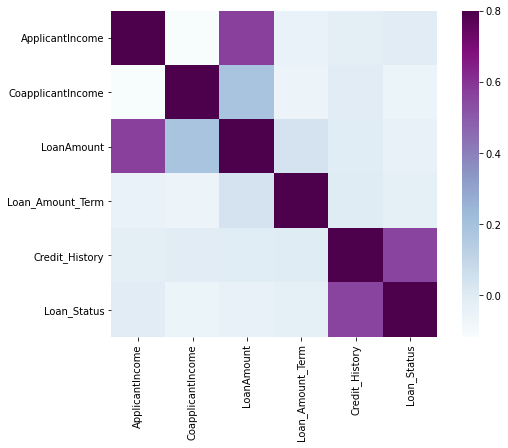

In [28]:
matrix = train.corr() 
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix, vmax=.8, square=True , cmap='BuPu') 
plt.show()

In [29]:
matrix

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


- We see that the most correlated variables are (ApplicantIncome - LoanAmount) and (Credit_History - Loan_Status). LoanAmount is also correlated with CoapplicantIncome.

## Missing Value and Outlier Treatment ##

- we can now impute the missing values and treat the outliers because missing data and outliers can have adverse effect on the model performance.

### Missing value imputation ###


In [30]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [31]:
# For categorical variables: imputation using mode

train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [32]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [33]:
# So we can use mode method for this variable. Mean or median are not good feet here

train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

- Now we will see the LoanAmount variable. 
- We will use median to fill the null values as earlier we saw that loan amount have outliers 

In [34]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [35]:
train.isnull().sum().sum() # total number of null values

0

- As we can see that all the missing values have been filled in the train dataset. Let’s fill all the missing values in the __test dataset__ too with the same approach.

In [36]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True) 
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True) 
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True) 
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

### Outlier Treatment ###

- As we saw earlier in univariate analysis, LoanAmount contains outliers so we have to treat them as the presence of outliers affects the distribution of the data
- It can be seen that having outliers often has a significant effect on the mean and standard deviation and hence affecting the distribution.

- One way to remove the skewness is by doing the log transformation. As we take the log transformation, it does not affect the smaller values much, but reduces the larger values. So, we get a distribution similar to normal distribution.

<AxesSubplot:>

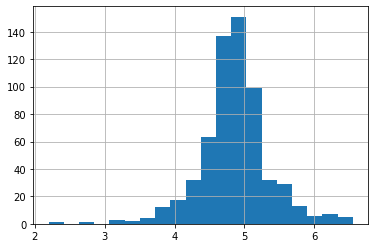

In [37]:
train['LoanAmount_log'] = np.log(train['LoanAmount']) 
test['LoanAmount_log'] = np.log(test['LoanAmount'])
train['LoanAmount_log'].hist(bins=20) 


In [38]:
# Drop column that has not any effect on Loan_Status 

train = train.drop('Loan_ID', axis=1)
test = test.drop('Loan_ID', axis=1)

### Model Building : Part I ###


- We will start with logistic regression classification algorithm
- We will use scikit-learn (sklearn) for making different models 

In [39]:
# Sklearn requires the target variable in a separate dataset.

X = train.drop('Loan_Status', 1)
y = train.Loan_Status

In [40]:
# Let's make dummy variables for the categorical variables in dataset

X = pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)


In [41]:
train.dtypes

ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Loan_Status                  int64
LoanAmount_log             float64
Gender_Female                uint8
Gender_Male                  uint8
Married_No                   uint8
Married_Yes                  uint8
Dependents_3                 uint8
Dependents_0                 uint8
Dependents_1                 uint8
Dependents_2                 uint8
Education_Graduate           uint8
Education_Not Graduate       uint8
Self_Employed_No             uint8
Self_Employed_Yes            uint8
Property_Area_Rural          uint8
Property_Area_Semiurban      uint8
Property_Area_Urban          uint8
dtype: object

In [42]:
# We divide train dataset into two part train and validation

from sklearn.model_selection import train_test_split 

x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size = 0.25)

In [43]:
# Le's fit the logistic regression model 

from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

model = LogisticRegression() 
model.fit(x_train, y_train)

LogisticRegression()

In [44]:
# Let's predict the Loan_status for validation set and calculate its accuracy

pred_cv = model.predict(x_cv)
accuracy_score(y_cv, pred_cv)

0.7727272727272727

- Our prediction are 80% accurate.

In [45]:
# Let's make prediction for the test dataset

pred_test= model.predict(test)

In [46]:
# let's import submission file to submit our result

submission = pd.read_csv('sample_submission.txt')

# We only need the Loan_ID and Loan_Status columns 

submission['Loan_Status'] = pred_test 
submission['Loan_ID'] = test_original['Loan_ID']

# We need predictions in 'Y' and 'N' format 

submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

# Finally we will convert submission to csv file to submit and check the accuracy 

pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv('submission_1.csv', index=False)

- From this submission we got an accuracy of 0.75

#### Logistic Regression using stratified k-folds cross validation ####


In [47]:
from sklearn.model_selection import StratifiedKFold

# Let's make a cross validation logistic model with stratified 5 folds and make predictions

i=1
kf=StratifiedKFold(n_splits =5, random_state=1, shuffle=True)
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = LogisticRegression(random_state=1)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 
    pred_test = model.predict(test) 
    pred=model.predict_proba(xvl)[:,1]  
  


1 of kfold 5
accuracy_score 0.8048780487804879

2 of kfold 5
accuracy_score 0.8373983739837398

3 of kfold 5
accuracy_score 0.7804878048780488

4 of kfold 5
accuracy_score 0.7886178861788617

5 of kfold 5
accuracy_score 0.7950819672131147


- The mean validation accuracy for this model turns out to be 0.80.Let us visualize the roc curve.


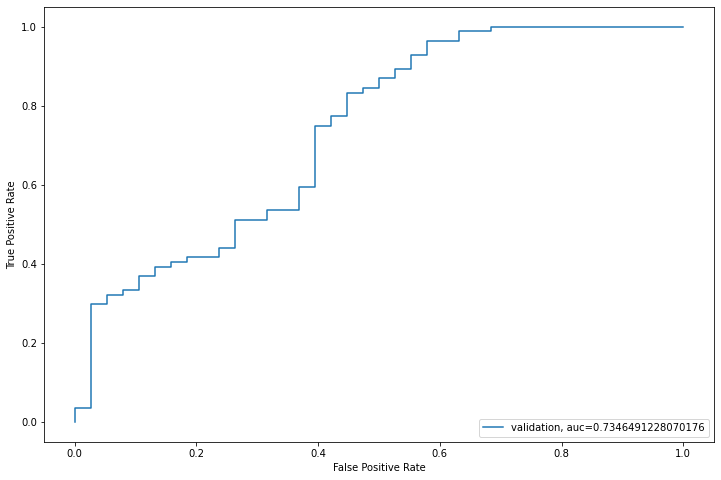

In [48]:
from sklearn import metrics 
fpr, tpr, _ = metrics.roc_curve(yvl,  pred) 
auc = metrics.roc_auc_score(yvl, pred) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="validation, auc="+str(auc)) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

In [49]:
submission['Loan_Status']=pred_test 
submission['Loan_ID']=test_original['Loan_ID']

submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)

pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Logistic_sub2.csv', index=False)


- From this submission we got an accuracy of 0.76

### Feature Engineering ###


__Based on the domain knowledge, we can come up with new features that might affect the target variable. We will create the following three new features:__

*  __Total Income__ - As discussed during bivariate analysis we will combine the Applicant Income and Coapplicant Income. If the total income is high, chances of loan approval might also be high.

*  __EMI__ - EMI is the monthly amount to be paid by the applicant to repay the loan. Idea behind making this variable is that people who have high EMI’s might find it difficult to pay back the loan. We can calculate the EMI by taking the ratio of loan amount with respect to loan amount term.

*  __Balance Income__ - This is the income left after the EMI has been paid. Idea behind creating this variable is that if this value is high, the chances are high that a person will repay the loan and hence increasing the chances of loan approval.

In [50]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
test['Total_Income'] = test['ApplicantIncome'] + test['CoapplicantIncome']


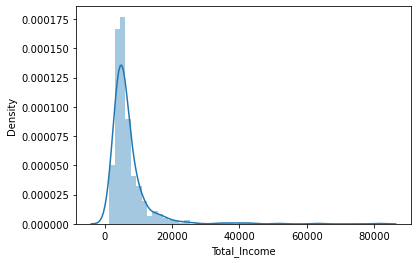

In [51]:
# Let's check the distribution of Total_Income
sns.distplot(train['Total_Income'])
plt.show()

- We can see it is shifted towards left, i.e., the distribution is right skewed. So, let’s take the log transformation to make the distribution normal.

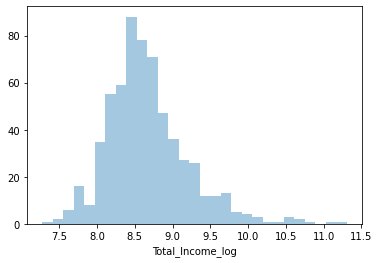

In [52]:
train['Total_Income_log'] = np.log(train['Total_Income'])
test['Total_Income_log'] = np.log(test['Total_Income'])
sns.distplot(train['Total_Income_log'], kde=False)
plt.show()

- Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided. 
- Let’s create the EMI feature now.

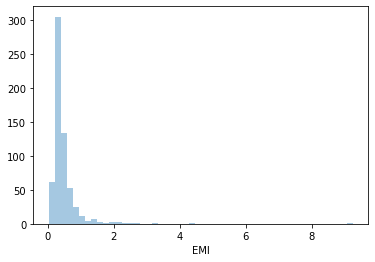

In [53]:
train['EMI'] = train['LoanAmount']/train['Loan_Amount_Term']
test['EMI'] = test['LoanAmount']/test['Loan_Amount_Term']

sns.distplot(train['EMI'], kde=False)
plt.show()

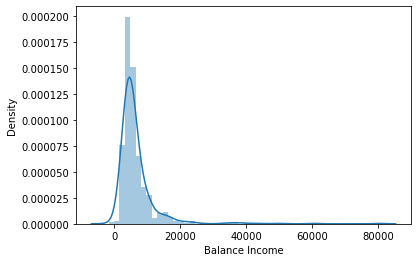

In [54]:
#### Let's create Balance Income feature now and check its distribution.

train['Balance Income']=train['Total_Income']-(train['EMI']*1000) # Multiply with 1000 to make the units real of 'Loan_Amount'
test['Balance Income']=test['Total_Income']-(test['EMI']*1000)

sns.distplot(train['Balance Income'])
plt.show()

- Let us now drop the variables which we used to create these new features.
Reason for doing this is, the correlation between those old features and these new features will be very high and logistic regression assumes that the variables are not highly correlated. We also wants to remove the noise from the dataset, so removing correlated features will help in reducing the noise too.

In [55]:
train=train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1) 
test=test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

__we can continue the model building process__


In [56]:
# Prepare the new dataset for feeding into the modes
X = train.drop('Loan_Status', 1) 
y = train.Loan_Status

### Logistic Regression

In [57]:
i=1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = LogisticRegression(random_state=1) 
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1 
    pred_test = model.predict(test) 
    pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.7886178861788617

2 of kfold 5
accuracy_score 0.6910569105691057

3 of kfold 5
accuracy_score 0.6666666666666666

4 of kfold 5
accuracy_score 0.7804878048780488

5 of kfold 5
accuracy_score 0.680327868852459


- The mean validation accuracy for this model is __0.72__


In [58]:
# Let's make the submission 

submission['Loan_Status']=pred_test            
submission['Loan_ID']=test_original['Loan_ID']

submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)

pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Log2.csv', index=False)

- __we got an accuracy of 0.72__


### Decision Tree ###

In [59]:
from sklearn import tree 

In [60]:
# Let's fit the decision tree model with 5 folds of cross validation

i=1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score', score)
    i+=1
    pred_test = model.predict(test)
    pred=model.predict_proba(xvl)[:,1]



1 of kfold 5
accuracy_score 0.7398373983739838

2 of kfold 5
accuracy_score 0.6991869918699187

3 of kfold 5
accuracy_score 0.7560975609756098

4 of kfold 5
accuracy_score 0.7073170731707317

5 of kfold 5
accuracy_score 0.6721311475409836


- The mean validation accuracy for this model is __0.72__


In [61]:
# Let's make the submission 

submission['Loan_Status']=pred_test            
submission['Loan_ID']=test_original['Loan_ID']

submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)

pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Decision_Tree.csv', index=False)

- __we got an accuracy of 0.64__


### Random Forest ###

In [62]:
from sklearn.ensemble import RandomForestClassifier
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = RandomForestClassifier(random_state=1, max_depth=10)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
    pred_test = model.predict(test)


1 of kfold 5
accuracy_score 0.8292682926829268

2 of kfold 5
accuracy_score 0.8130081300813008

3 of kfold 5
accuracy_score 0.7723577235772358

4 of kfold 5
accuracy_score 0.8048780487804879

5 of kfold 5
accuracy_score 0.7540983606557377


- The mean validation accuracy for this model is __0.795__


In [63]:
# Let's make the submission 

submission['Loan_Status']=pred_test            
submission['Loan_ID']=test_original['Loan_ID']

submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)

pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Random Forest.csv', index=False)

- __we got an accuracy of 0.78__


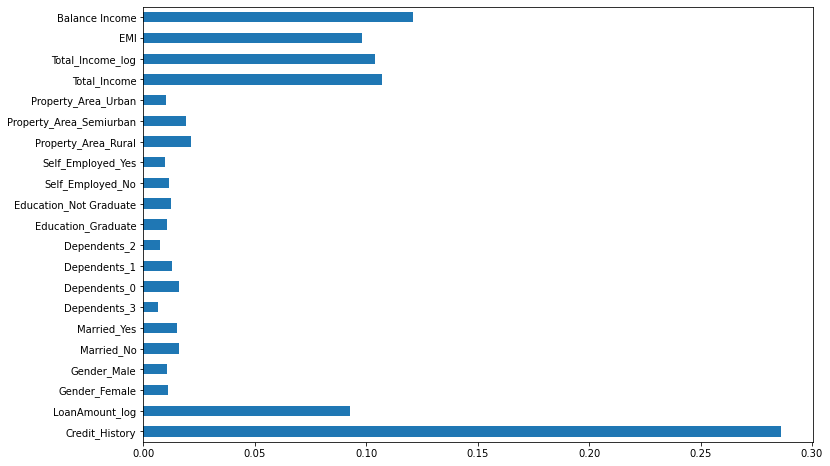

In [64]:
# Let us find the feature importance now, i.e. which features are most important for this problem. We will use feature_importances_ attribute of sklearn to do so.

importances=pd.Series(model.feature_importances_, index=X.columns) 
importances.plot(kind='barh', figsize=(12,8))
plt.show()

- We can see that Credit_History is the most important feature followed by Balance Income, Total Income, EMI. So, feature engineering helped us in predicting our target variable.

### Conclusion

__After trying and testing 3 different algorithms, the best accuracy is achieved by *Random Forest (0.78)*__

## Artificial Neural Network

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [69]:
import tensorflow as tf

In [70]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(X_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8090 - accuracy: 0.3218
Epoch 2/100
16/16 [==============================] - 0s 1ms/step - loss: 0.7731 - accuracy: 0.3259
Epoch 3/100
16/16 [==============================] - 0s 1ms/step - loss: 0.7445 - accuracy: 0.3381
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7221 - accuracy: 0.3788
Epoch 5/100
16/16 [==============================] - 0s 1ms/step - loss: 0.7037 - accuracy: 0.4603
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6891 - accuracy: 0.5682
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6767 - accuracy: 0.6497
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6663 - accuracy: 0.7026
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6564 - accuracy: 0.7230
Epoch 10/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6485 - accuracy: 0.7434
Epoch 11/

In [71]:
y_pred = (ann.predict(X_test) > 0.5)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[12 21]
 [ 7 83]]
0.7723577235772358
